## Required Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("UM_datathon_2024.csv")

In [3]:
print(data.head())

                  time    difficulty  estimated_leverage_ratio  \
0  2020-03-25 10:00:00  1.655292e+13                  0.070577   
1  2020-03-25 11:00:00  1.655292e+13                  0.071966   
2  2020-03-25 12:00:00  1.655292e+13                  0.072686   
3  2020-03-25 13:00:00           NaN                  0.070549   
4  2020-03-25 14:00:00  1.655292e+13                  0.071959   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                   30656                   12888                     21617   
1                   21379                    8467                     14875   
2                   29164                   13292                     19201   
3                       0                       0                         0   
4                   25234                   10221                     18363   

   exchange_whale_ratio  coinbase_premium_gap  coinbase_premium_index  \
0              0.940847                 12.50          

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41498 entries, 0 to 41497
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  41498 non-null  object 
 1   difficulty                            41363 non-null  float64
 2   estimated_leverage_ratio              41498 non-null  float64
 3   addresses_count_active                41498 non-null  int64  
 4   addresses_count_sender                41498 non-null  int64  
 5   addresses_count_receiver              41498 non-null  int64  
 6   exchange_whale_ratio                  41498 non-null  float64
 7   coinbase_premium_gap                  41466 non-null  float64
 8   coinbase_premium_index                41466 non-null  float64
 9   coinbase_premium_gap_usdt_adjusted    41466 non-null  float64
 10  coinbase_premium_index_usdt_adjusted  41466 non-null  float64
 11  taker_buy_volum

## Performing EDA

In [5]:
summary_stats = data.describe()
print(summary_stats)

         difficulty  estimated_leverage_ratio  addresses_count_active  \
count  4.136300e+04              41498.000000            41498.000000   
mean   4.206425e+13                  0.182852            52901.173069   
std    2.629437e+13                  0.048183            19294.800038   
min    1.367259e+13                  0.069790                0.000000   
25%    2.060742e+13                  0.147567            39617.250000   
50%    3.028329e+13                  0.176065            51104.500000   
75%    5.732151e+13                  0.211900            64618.750000   
max    1.085226e+14                  0.359523           162532.000000   

       addresses_count_sender  addresses_count_receiver  exchange_whale_ratio  \
count            41498.000000              41498.000000          41498.000000   
mean             29239.806376              28752.070582              0.871944   
std              13084.303439              11071.154437              0.097557   
min               

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

time                                      0
difficulty                              135
estimated_leverage_ratio                  0
addresses_count_active                    0
addresses_count_sender                    0
addresses_count_receiver                  0
exchange_whale_ratio                      0
coinbase_premium_gap                     32
coinbase_premium_index                   32
coinbase_premium_gap_usdt_adjusted       32
coinbase_premium_index_usdt_adjusted     32
taker_buy_volume                          7
taker_sell_volume                         7
taker_buy_ratio                           7
taker_sell_ratio                          7
taker_buy_sell_ratio                      7
blockreward                               0
blockreward_usd                           0
fees_transaction_mean                   135
fees_transaction_mean_usd               135
fees_transaction_median                   0
fees_transaction_median_usd               0
miner_supply_ratio              

In [8]:
#Exclude Non-Numeric Columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

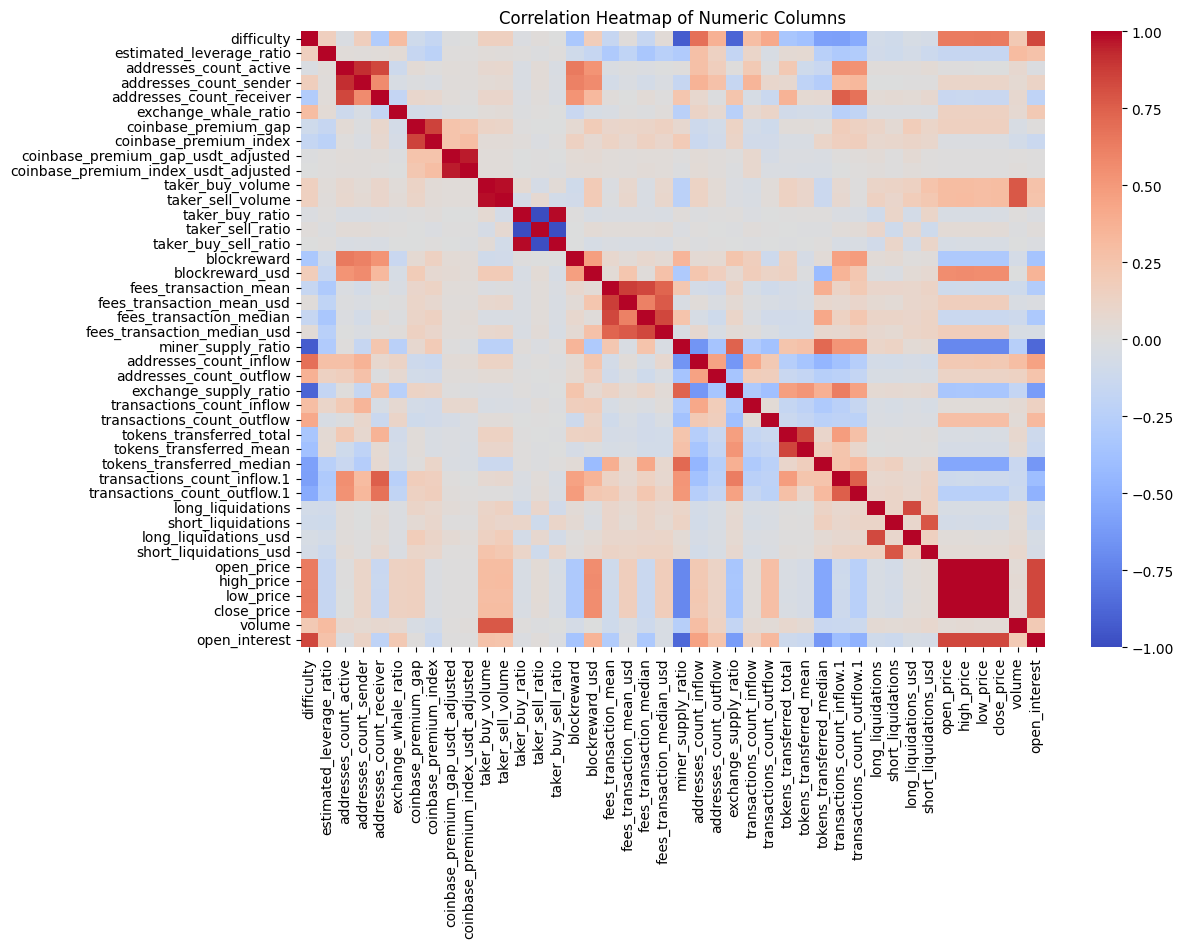

In [11]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

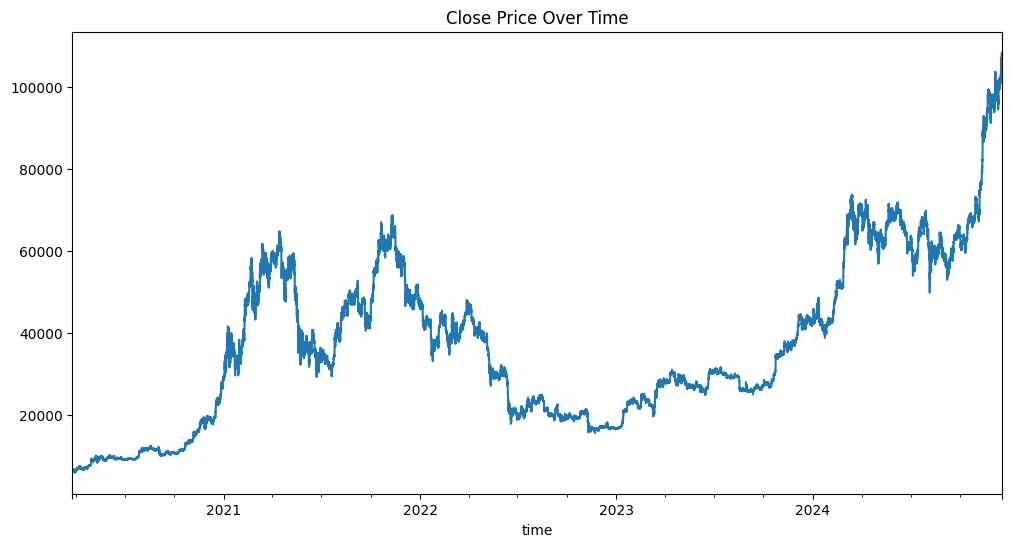

In [12]:
#Visualization of Key Factors over-time
data['time'] = pd.to_datetime(data['time'])  # Convert 'time' column to datetime
data.set_index('time', inplace=True)

# Plot close_price over time
data['close_price'].plot(figsize=(12, 6), title="Close Price Over Time")
plt.show()

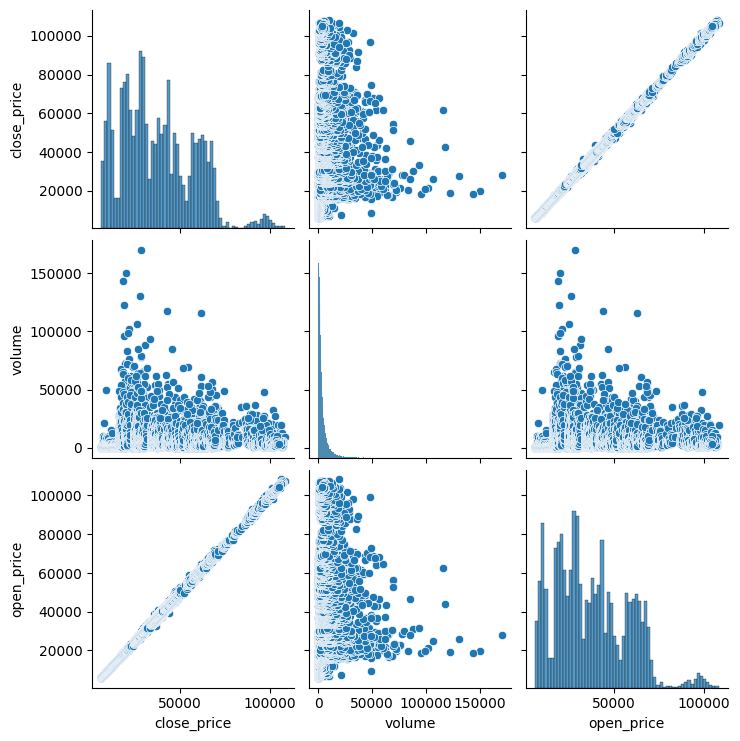

In [13]:
#Highlight Relationships
sns.pairplot(data[['close_price', 'volume', 'open_price']])
plt.show()

## Data Cleaning

Missing Value Percentage:
difficulty                              0.325317
estimated_leverage_ratio                0.000000
addresses_count_active                  0.000000
addresses_count_sender                  0.000000
addresses_count_receiver                0.000000
exchange_whale_ratio                    0.000000
coinbase_premium_gap                    0.077112
coinbase_premium_index                  0.077112
coinbase_premium_gap_usdt_adjusted      0.077112
coinbase_premium_index_usdt_adjusted    0.077112
taker_buy_volume                        0.016868
taker_sell_volume                       0.016868
taker_buy_ratio                         0.016868
taker_sell_ratio                        0.016868
taker_buy_sell_ratio                    0.016868
blockreward                             0.000000
blockreward_usd                         0.000000
fees_transaction_mean                   0.325317
fees_transaction_mean_usd               0.325317
fees_transaction_median                 0.0

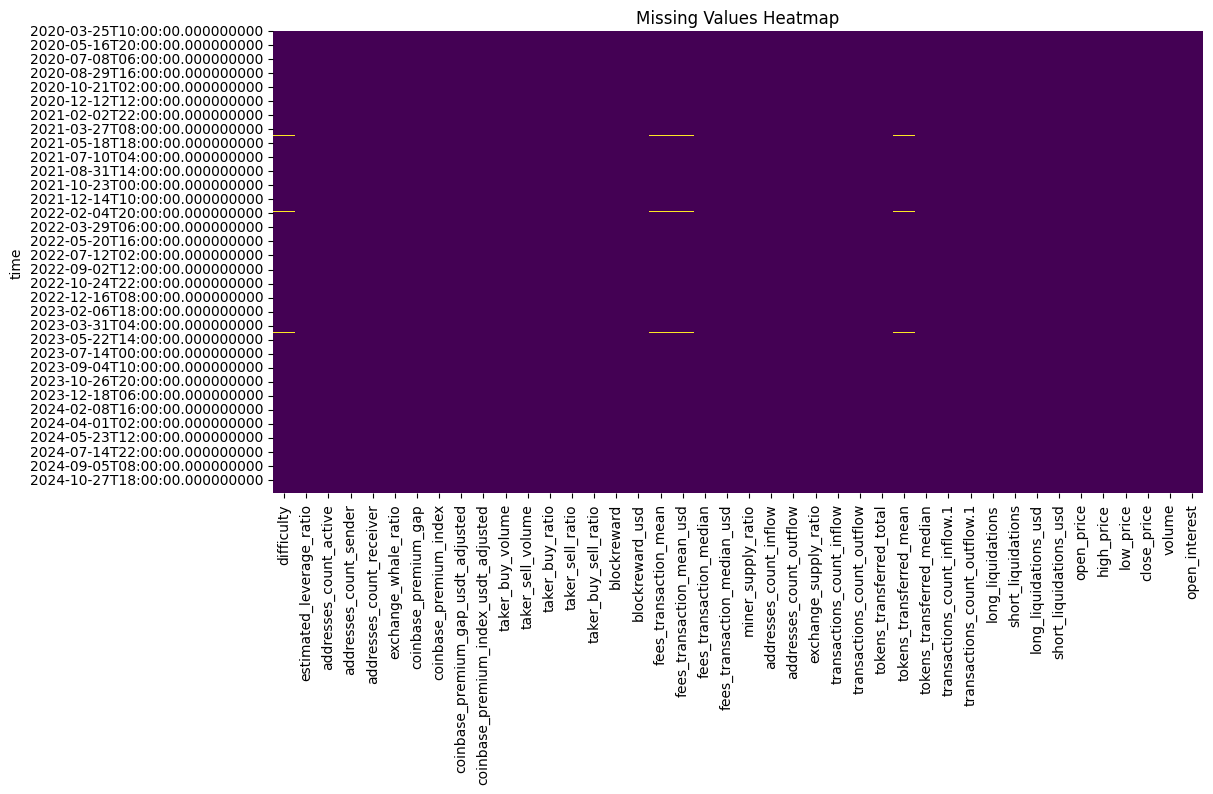

Outlier Summary:
                                  Column  Outlier Count
0                             difficulty              0
1               estimated_leverage_ratio            684
2                 addresses_count_active            654
3                 addresses_count_sender            745
4               addresses_count_receiver            681
5                   exchange_whale_ratio           1152
6                   coinbase_premium_gap           4528
7                 coinbase_premium_index           3265
8     coinbase_premium_gap_usdt_adjusted           6258
9   coinbase_premium_index_usdt_adjusted           5978
10                      taker_buy_volume           2820
11                     taker_sell_volume           2778
12                       taker_buy_ratio            569
13                      taker_sell_ratio            569
14                  taker_buy_sell_ratio            848
15                           blockreward            752
16                       blockr

In [14]:
# 1. Analyze Missing Values
missing_percentage = data.isnull().sum() / len(data) * 100
print("Missing Value Percentage:")
print(missing_percentage)

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 2. Detect Outliers using IQR Method
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=["Column", "Outlier Count"])
print("Outlier Summary:")
print(outlier_summary_df)


In [18]:
# Step 1: Check the columns with high missing values (> 50%)
high_missing_columns = missing_percentage[missing_percentage > 50].index

# Drop columns with high missing percentages
data_cleaned = data.drop(columns=high_missing_columns)

# Step 2: For columns with low missing values, decide on imputation
# Numerical columns
numerical_columns_with_missing = data_cleaned.select_dtypes(include=['float64', 'int64']).columns[
    data_cleaned.select_dtypes(include=['float64', 'int64']).isnull().any()
]

# Impute numerical columns with their mean
for col in numerical_columns_with_missing:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())

# Step 3: Categorical columns (if any)
categorical_columns_with_missing = data_cleaned.select_dtypes(include=['object']).columns[
    data_cleaned.select_dtypes(include=['object']).isnull().any()
]

# Impute categorical columns with their mode
for col in categorical_columns_with_missing:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Step 4: Validate that there are no more missing values
# Step 4: Validate cleaning
missing_values_after_cleaning = data_cleaned.isnull().sum()

# Display the cleaned dataset and report missing values
print("Cleaned Dataset (Missing Values Handled):")
print(data_cleaned.head())  # Display the first 5 rows of the cleaned dataset

print("Missing Values After Cleaning:")
print(missing_values_after_cleaning)  # Display the count of missing values per column


Cleaned Dataset (Missing Values Handled):
                       difficulty  estimated_leverage_ratio  \
time                                                          
2020-03-25 10:00:00  1.655292e+13                  0.070577   
2020-03-25 11:00:00  1.655292e+13                  0.071966   
2020-03-25 12:00:00  1.655292e+13                  0.072686   
2020-03-25 13:00:00  4.206425e+13                  0.070549   
2020-03-25 14:00:00  1.655292e+13                  0.071959   

                     addresses_count_active  addresses_count_sender  \
time                                                                  
2020-03-25 10:00:00                   30656                   12888   
2020-03-25 11:00:00                   21379                    8467   
2020-03-25 12:00:00                   29164                   13292   
2020-03-25 13:00:00                       0                       0   
2020-03-25 14:00:00                   25234                   10221   

                  

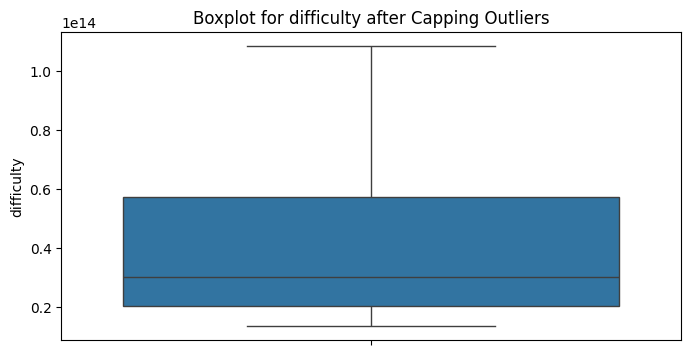

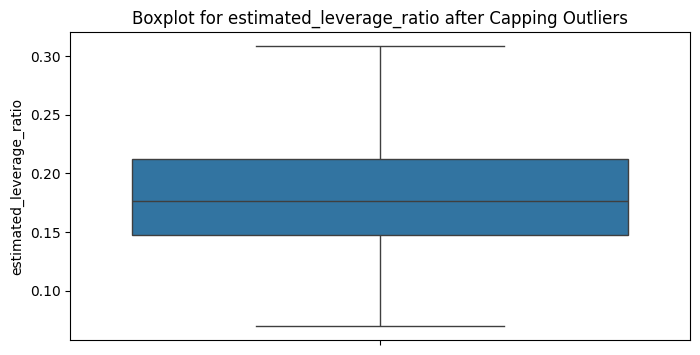

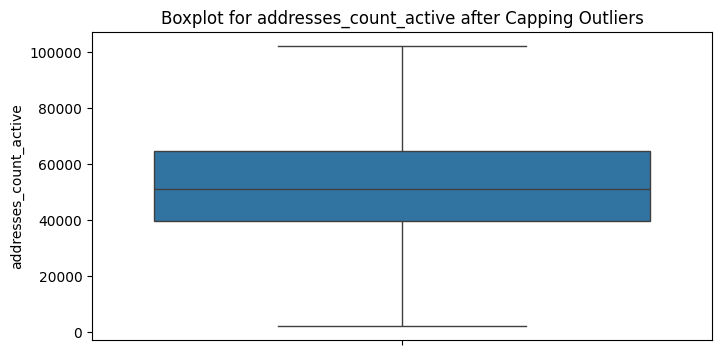

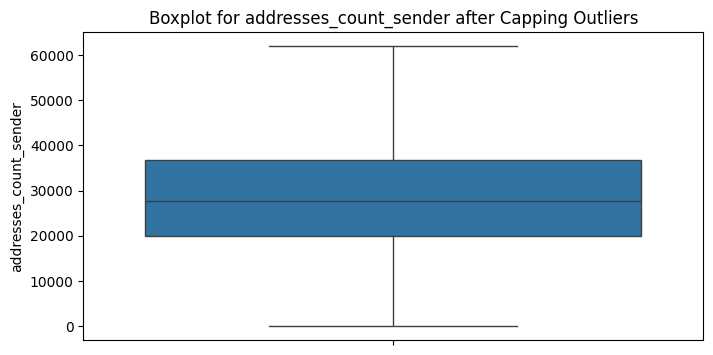

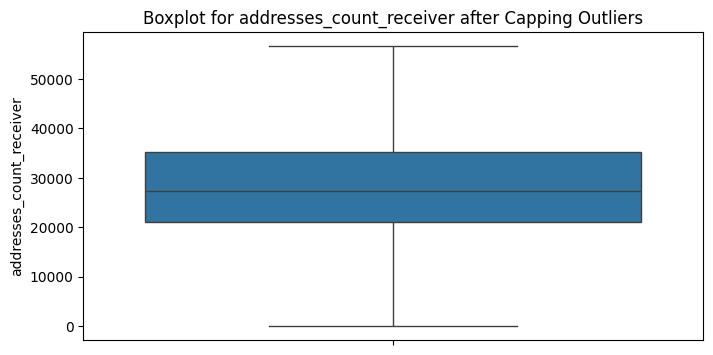

Dataset After Handling Outliers:
                       difficulty  estimated_leverage_ratio  \
time                                                          
2020-03-25 10:00:00  1.655292e+13                  0.070577   
2020-03-25 11:00:00  1.655292e+13                  0.071966   
2020-03-25 12:00:00  1.655292e+13                  0.072686   
2020-03-25 13:00:00  4.206425e+13                  0.070549   
2020-03-25 14:00:00  1.655292e+13                  0.071959   

                     addresses_count_active  addresses_count_sender  \
time                                                                  
2020-03-25 10:00:00                   30656                 12888.0   
2020-03-25 11:00:00                   21379                  8467.0   
2020-03-25 12:00:00                   29164                 13292.0   
2020-03-25 13:00:00                    2115                     0.0   
2020-03-25 14:00:00                   25234                 10221.0   

                     addres

In [20]:
# Apply capping for outliers using IQR
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the outlier handling using boxplots
for col in numerical_columns[:5]:  # Visualize the first 5 columns for clarity
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[col])
    plt.title(f"Boxplot for {col} after Capping Outliers")
    plt.show()

# Display the cleaned dataset
print("Dataset After Handling Outliers:")
print(data_cleaned.head())


## Possible Transformation

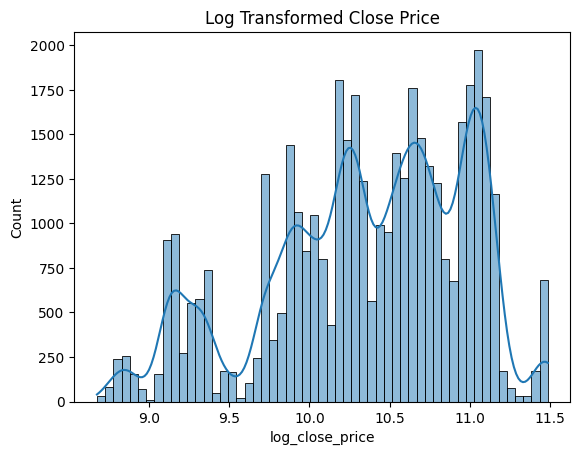

In [23]:
# 1.1 Log Transformation
# Apply log transformation to numerical columns
data_cleaned['log_close_price'] = np.log1p(data_cleaned['close_price'])
data_cleaned['log_volume'] = np.log1p(data_cleaned['volume'])

# Visualize transformed features
sns.histplot(data_cleaned['log_close_price'], kde=True)
plt.title('Log Transformed Close Price')
plt.show()

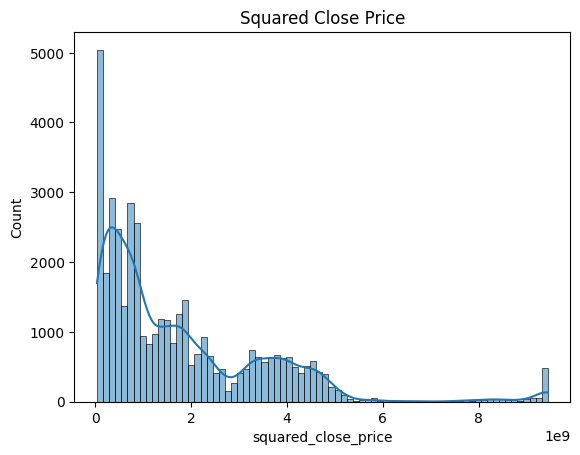

In [24]:
# 1.2 Square Transformation
# Apply square transformation
data_cleaned['squared_close_price'] = data_cleaned['close_price'] ** 2
data_cleaned['squared_volume'] = data_cleaned['volume'] ** 2

# Visualize transformed features
sns.histplot(data_cleaned['squared_close_price'], kde=True)
plt.title('Squared Close Price')
plt.show()

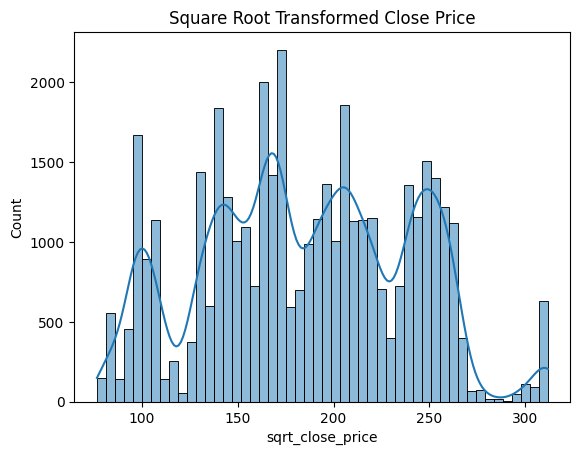

In [25]:
# 1.3 Square Root Transformation
# Apply square root transformation
data_cleaned['sqrt_close_price'] = np.sqrt(data_cleaned['close_price'])
data_cleaned['sqrt_volume'] = np.sqrt(data_cleaned['volume'])

# Visualize transformed features
sns.histplot(data_cleaned['sqrt_close_price'], kde=True)
plt.title('Square Root Transformed Close Price')
plt.show()

## Feature engineering

In [39]:
# Log transformations
data_cleaned['log_close_price'] = np.log1p(data_cleaned['close_price'])
data_cleaned['log_volume'] = np.log1p(data_cleaned['volume'])

# Square root transformation
data_cleaned['sqrt_active_addresses'] = np.sqrt(data_cleaned['addresses_count_active'])

# Rolling Z-score
rolling_window = 10
data_cleaned['z_close_price'] = (
    (data_cleaned['close_price'] - data_cleaned['close_price'].rolling(rolling_window).mean()) /
    data_cleaned['close_price'].rolling(rolling_window).std()
)

# Lagged features
data_cleaned['close_price_lag2'] = data_cleaned['close_price'].shift(2)
data_cleaned['rolling_mean_5'] = data_cleaned['close_price'].rolling(window=5).mean()
data_cleaned['rolling_std_5'] = data_cleaned['close_price'].rolling(window=5).std()
data_cleaned.dropna(inplace=True)

### Random Forest Modelling

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = data_cleaned[['log_volume', 'sqrt_active_addresses', 'z_close_price', 'close_price_lag1']]
y = data_cleaned['close_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 500751.55042324547


In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate with best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Tuned Mean Squared Error:", mse_best)


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Mean Squared Error: 50776.54402251822


In [49]:
# Calculate RMSE
rmse_tuned = np.sqrt(50776.54402251822)
print("Tuned RMSE:", rmse_tuned)

# Mean of target variable
mean_close_price = y_test.mean()
print("Mean Close Price:", mean_close_price)

Tuned RMSE: 225.33651284804736
Mean Close Price: 36441.01691676793


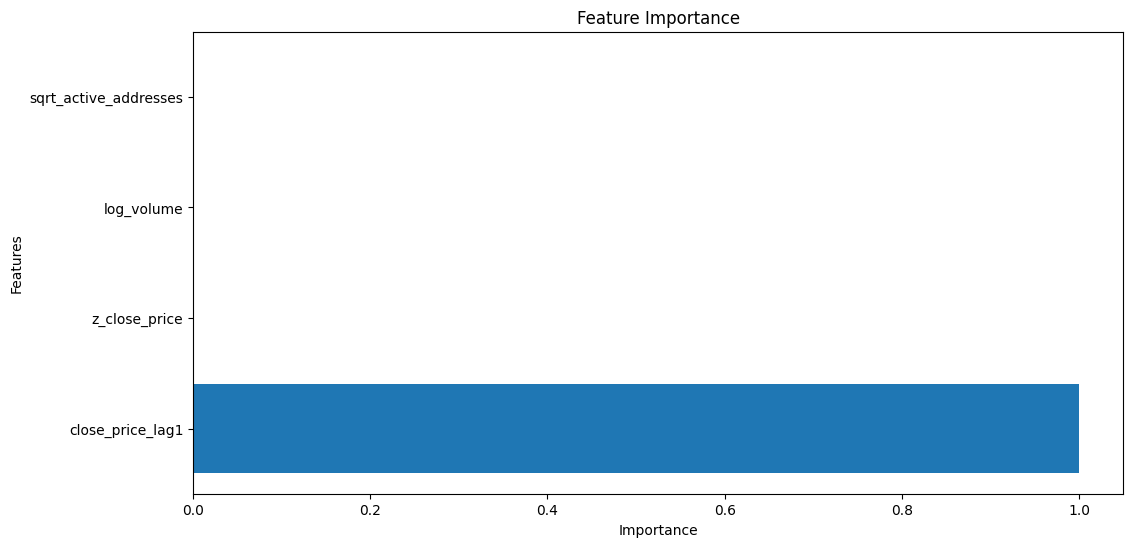

In [50]:
# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

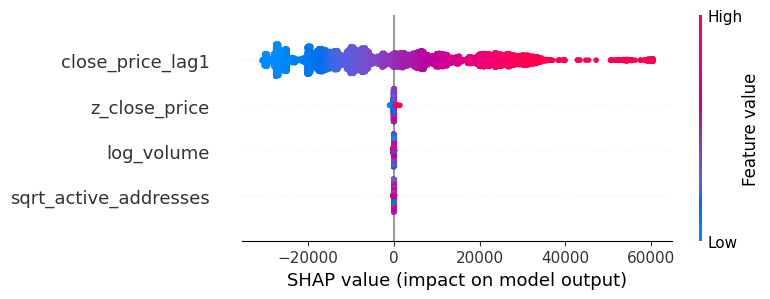

In [51]:
import shap

# SHAP explainability
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


### Explanability with shap

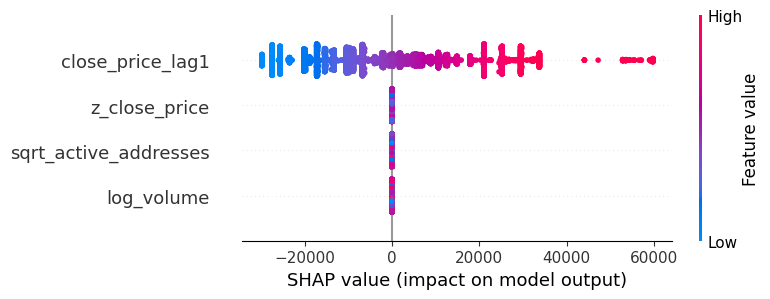

In [43]:
import shap

# SHAP explainability
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


### Trading Signal Generation

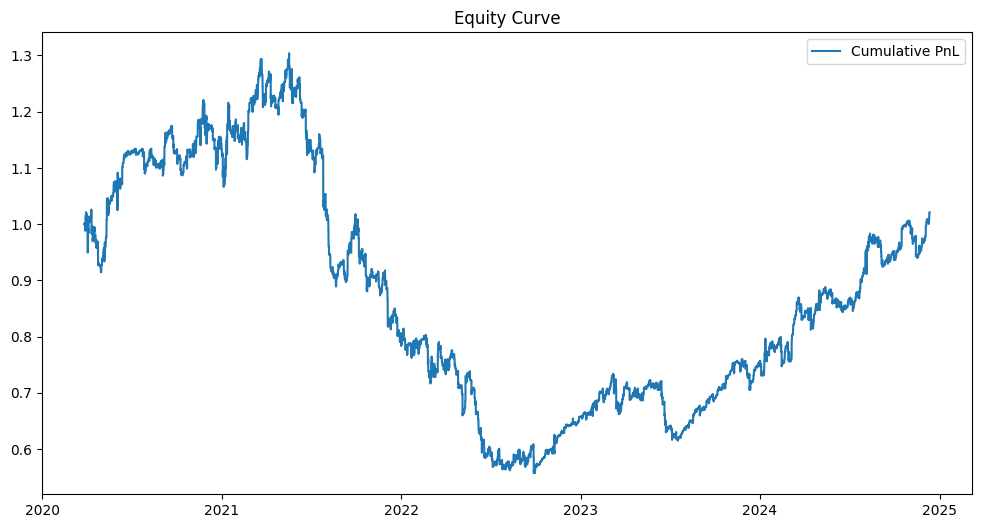

In [53]:
# Define signals based on Z-score thresholds
data_cleaned['signal'] = 0
data_cleaned.loc[data_cleaned['z_close_price'] < -2, 'signal'] = 1  # Buy
data_cleaned.loc[data_cleaned['z_close_price'] > 2, 'signal'] = -1  # Sell

# Calculate PnL
data_cleaned['pnl'] = data_cleaned['signal'].shift(1) * data_cleaned['close_price'].pct_change()
data_cleaned['cumulative_pnl'] = (1 + data_cleaned['pnl']).cumprod()

# Plot Equity Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['cumulative_pnl'], label='Cumulative PnL')
plt.title('Equity Curve')
plt.legend()
plt.show()

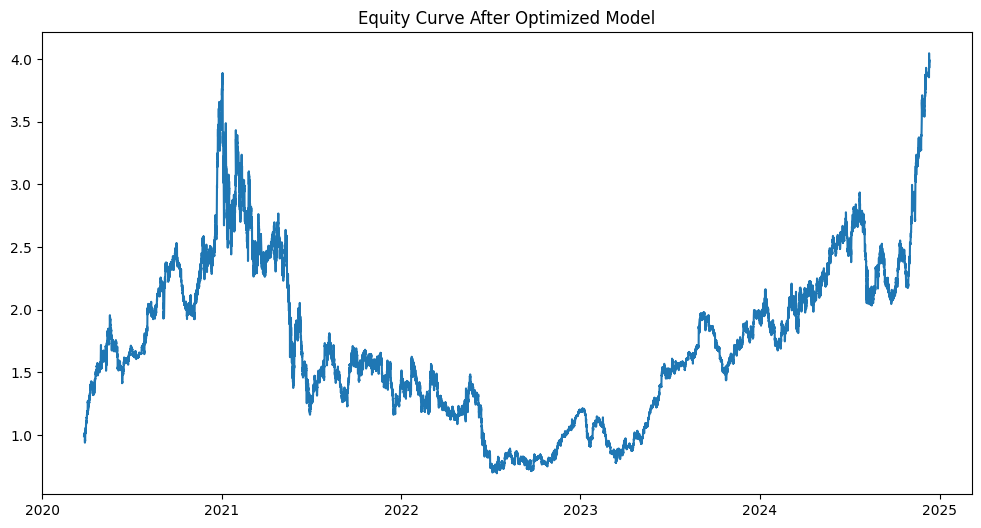

In [54]:
# Define buy/sell signals based on predictions
data_cleaned['predicted_price'] = best_model.predict(X)
data_cleaned['signal'] = 0
data_cleaned.loc[data_cleaned['predicted_price'] > data_cleaned['close_price'], 'signal'] = 1  # Buy
data_cleaned.loc[data_cleaned['predicted_price'] < data_cleaned['close_price'], 'signal'] = -1  # Sell

# Calculate PnL
data_cleaned['pnl'] = data_cleaned['signal'].shift(1) * data_cleaned['close_price'].pct_change()
data_cleaned['cumulative_pnl'] = (1 + data_cleaned['pnl']).cumprod()

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['cumulative_pnl'])
plt.title('Equity Curve After Optimized Model')
plt.show()


### Evaluate the Trading Performance

In [56]:
# Sharpe Ratio
sharpe_ratio = data_cleaned['pnl'].mean() / data_cleaned['pnl'].std() * np.sqrt(252)
print("Sharpe Ratio:", sharpe_ratio)

# Max Drawdown
max_drawdown = (data_cleaned['cumulative_pnl'] / data_cleaned['cumulative_pnl'].cummax() - 1).min()
print("Max Drawdown:", max_drawdown)

# Total Return
total_return = data_cleaned['cumulative_pnl'].iloc[-1] - 1
print("Total Return:", total_return)


Sharpe Ratio: 0.13311292964547994
Max Drawdown: -0.8214073385646943
Total Return: 2.989543280708815


## Forward Testing:

### Dataset Split

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Calculate split indices
train_size = int(0.6 * len(data_cleaned))
validation_size = int(0.2 * len(data_cleaned))

# Split dataset
train = data_cleaned[:train_size]
validation = data_cleaned[train_size:train_size + validation_size]
forward_test = data_cleaned[train_size + validation_size:]

# Define features and target for each set
features = ['log_volume', 'sqrt_active_addresses', 'z_close_price', 'close_price_lag1']
target = 'close_price'

X_train, y_train = train[features], train[target]
X_validation, y_validation = validation[features], validation[target]
X_forward, y_forward = forward_test[features], forward_test[target]

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_validation)}")
print(f"Forward test set size: {len(X_forward)}")


Training set size: 24687
Validation set size: 8229
Forward test set size: 8230


### Train and Validate the Model

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Validate the model
y_validation_pred = rf_model.predict(X_validation)
validation_mse = mean_squared_error(y_validation, y_validation_pred)
print("Validation MSE:", validation_mse)

Validation MSE: 28044.7690661156


### Forward Test the Model

In [61]:
# Forward test the model
y_forward_pred = rf_model.predict(X_forward)
forward_mse = mean_squared_error(y_forward, y_forward_pred)
print("Forward Test MSE:", forward_mse)


Forward Test MSE: 47372603.4176051


### Check means and standard deviations

In [62]:

print("Validation Mean Close Price:", y_validation.mean())
print("Forward Test Mean Close Price:", y_forward.mean())

print("Validation Std Close Price:", y_validation.std())
print("Forward Test Std Close Price:", y_forward.std())



Validation Mean Close Price: 29176.174310365783
Forward Test Mean Close Price: 62972.507162818954
Validation Std Close Price: 5335.620404092796
Forward Test Std Close Price: 11875.720911647759


### Retrain the Model

In [63]:
# Combine Training and Validation data
X_train_combined = pd.concat([X_train, X_validation], axis=0)
y_train_combined = pd.concat([y_train, y_validation], axis=0)

# Retrain the model
rf_model_retrained = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    random_state=42
)
rf_model_retrained.fit(X_train_combined, y_train_combined)

# Evaluate on Forward Test Set
y_forward_pred_retrained = rf_model_retrained.predict(X_forward)
forward_mse_retrained = mean_squared_error(y_forward, y_forward_pred_retrained)
print("Retrained Forward Test MSE:", forward_mse_retrained)


Retrained Forward Test MSE: 47439069.31414811
